IT24100391

In [1]:
import pandas as pd 

In [2]:
raw_data=pd.read_csv('global_student_migration.csv')

In [3]:
raw_data.head() #first 5 records

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [4]:
raw_data.info() #information about data set records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [5]:
raw_data.size

100000

In [6]:
raw_data.shape

(5000, 20)

In [11]:
raw_data.index

RangeIndex(start=0, stop=5000, step=1)

In [12]:
#find null values

In [13]:
raw_data.isnull().sum() 

student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country            2491
placement_company            2491
starting_salary_usd             0
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test     982
test_score                      0
dtype: int64

In [14]:
#create data frame as data 

In [15]:
data = pd.DataFrame(raw_data)

In [16]:
import matplotlib.pyplot as plt

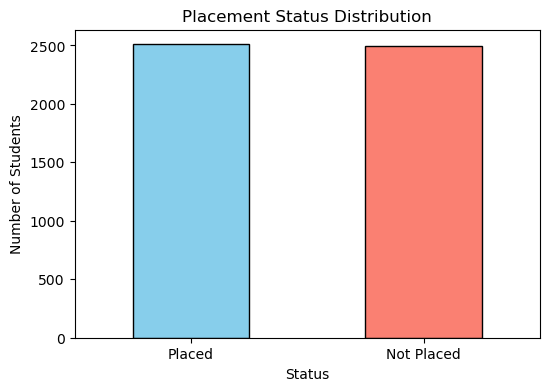

In [17]:
status_counts = data['placement_status'].value_counts()

plt.figure(figsize=(6, 4))
status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Placement Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Students')
plt.xticks(rotation=0) 
plt.show()

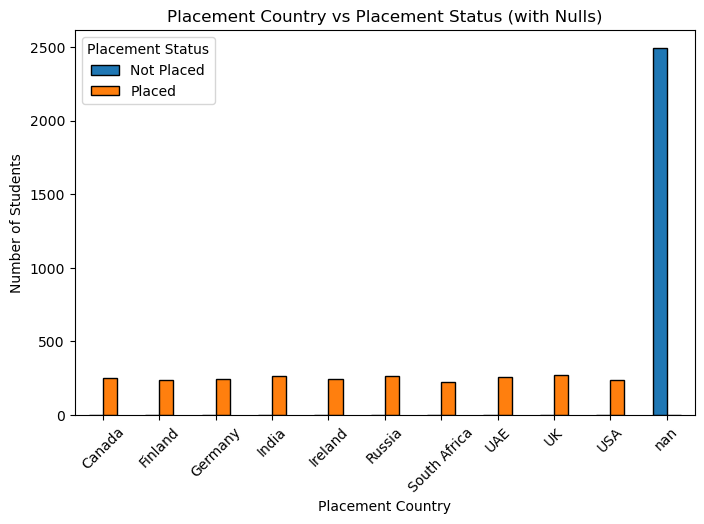

In [18]:
country_status = pd.crosstab(data['placement_country'],
                             data['placement_status'],
                             dropna=False)  


country_status.plot(kind='bar', figsize=(8,5), edgecolor='black')

plt.title('Placement Country vs Placement Status (with Nulls)')
plt.xlabel('Placement Country')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Placement Status')
plt.show()


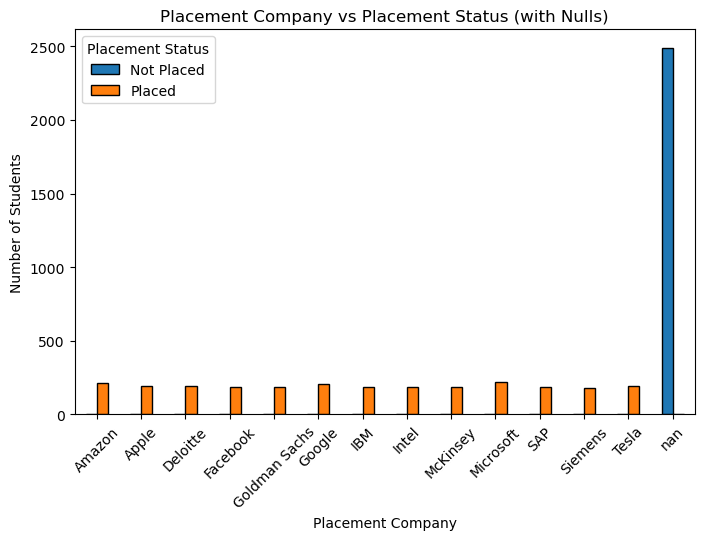

In [19]:
country_status = pd.crosstab(data['placement_company'],
                             data['placement_status'],
                             dropna=False)  # <-- keep NaN as a row

# --- Step 2: Plot grouped bar chart ---
country_status.plot(kind='bar', figsize=(8,5), edgecolor='black')

plt.title('Placement Company vs Placement Status (with Nulls)')
plt.xlabel('Placement Company')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Placement Status')
plt.show()


In [20]:
 #As placement status distribution distribution chart, data set has balanced target variable .
#As negative values in target variable columns don't have values in placement country and placement company .
# it shows from 'Placement Country vs Placement Status (with Nulls) ' chart and 'Placement Company vs Placement Status (with Nulls)' chart.
#therefore placement country feature and placement company feature have half of null values. 
#in cleaning part of preprocessing the data  set we cannot use drop option for  null values because data set may be imbalanced.
# The best option is ,fill null values as 'no placement' . 

In [21]:
data['placement_country'] = data['placement_country'].fillna('No Placement')
data['placement_company'] = data['placement_company'].fillna('No Placement')

In [22]:
data.isnull().sum()

student_id                     0
origin_country                 0
destination_country            0
destination_city               0
university_name                0
course_name                    0
field_of_study                 0
year_of_enrollment             0
scholarship_received           0
enrollment_reason              0
graduation_year                0
placement_status               0
placement_country              0
placement_company              0
starting_salary_usd            0
gpa_or_score                   0
visa_status                    0
post_graduation_visa           0
language_proficiency_test    982
test_score                     0
dtype: int64

In [23]:
data['language_proficiency_test'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: language_proficiency_test
Non-Null Count  Dtype 
--------------  ----- 
4018 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [24]:
import seaborn as sns

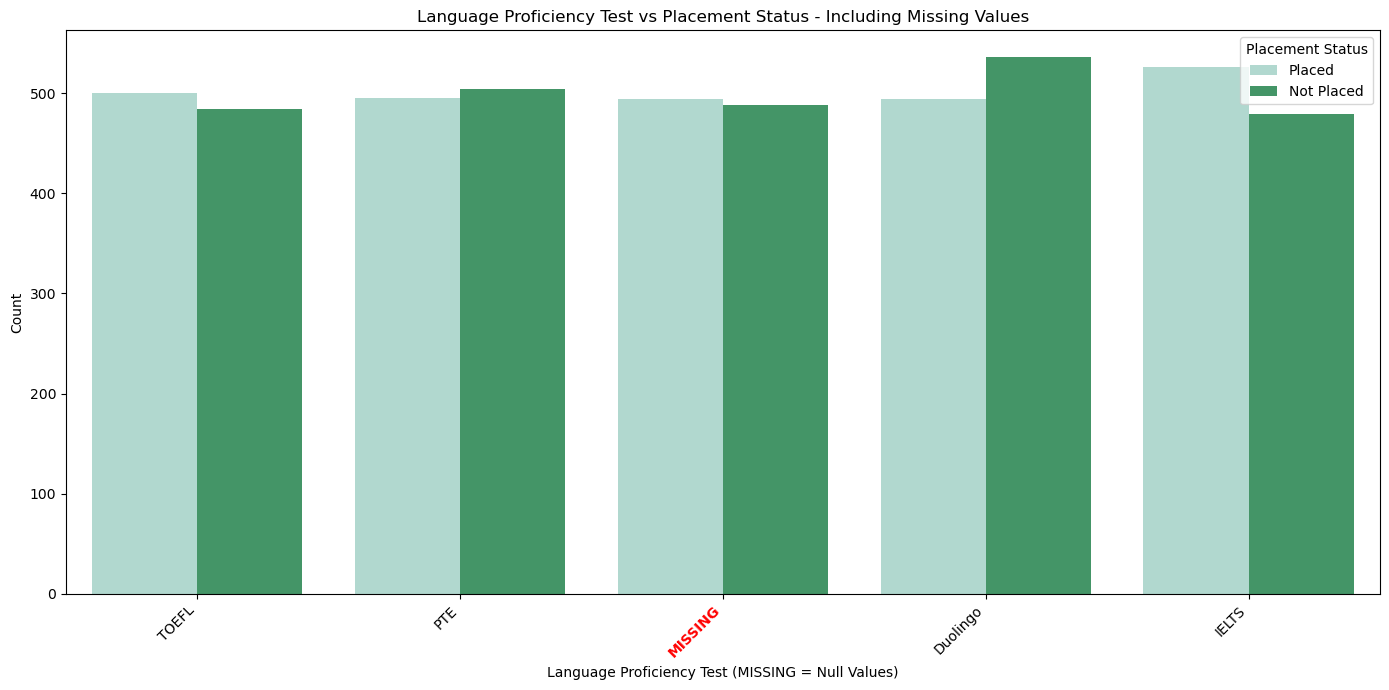

In [25]:
df_plot = data.copy()


df_plot['language_proficiency_test'] = df_plot['language_proficiency_test'].fillna('MISSING')
df_plot['placement_status'] = df_plot['placement_status'].fillna('MISSING')

plt.figure(figsize=(14, 7))


sns.countplot(data=df_plot, 
             x='language_proficiency_test', 
             hue='placement_status', 
             palette='BuGn')

plt.title("Language Proficiency Test vs Placement Status - Including Missing Values")
plt.xlabel("Language Proficiency Test (MISSING = Null Values)")
plt.ylabel("Count")
plt.legend(title="Placement Status")
plt.xticks(rotation=45, ha='right')

for i, label in enumerate(plt.gca().get_xticklabels()):
    if label.get_text() == 'MISSING':
        label.set_color('red')
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [26]:
# As this chart missing values included  approximately same records in  positive and negative values of target variable .
#So we can drop records of null values.

In [27]:
data['placement_country'] = data['placement_country'].fillna('No Placement')
data['placement_company'] = data['placement_company'].fillna('No Placement')

In [28]:
data.isnull().sum()

student_id                     0
origin_country                 0
destination_country            0
destination_city               0
university_name                0
course_name                    0
field_of_study                 0
year_of_enrollment             0
scholarship_received           0
enrollment_reason              0
graduation_year                0
placement_status               0
placement_country              0
placement_company              0
starting_salary_usd            0
gpa_or_score                   0
visa_status                    0
post_graduation_visa           0
language_proficiency_test    982
test_score                     0
dtype: int64

In [29]:
data['language_proficiency_test'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: language_proficiency_test
Non-Null Count  Dtype 
--------------  ----- 
4018 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


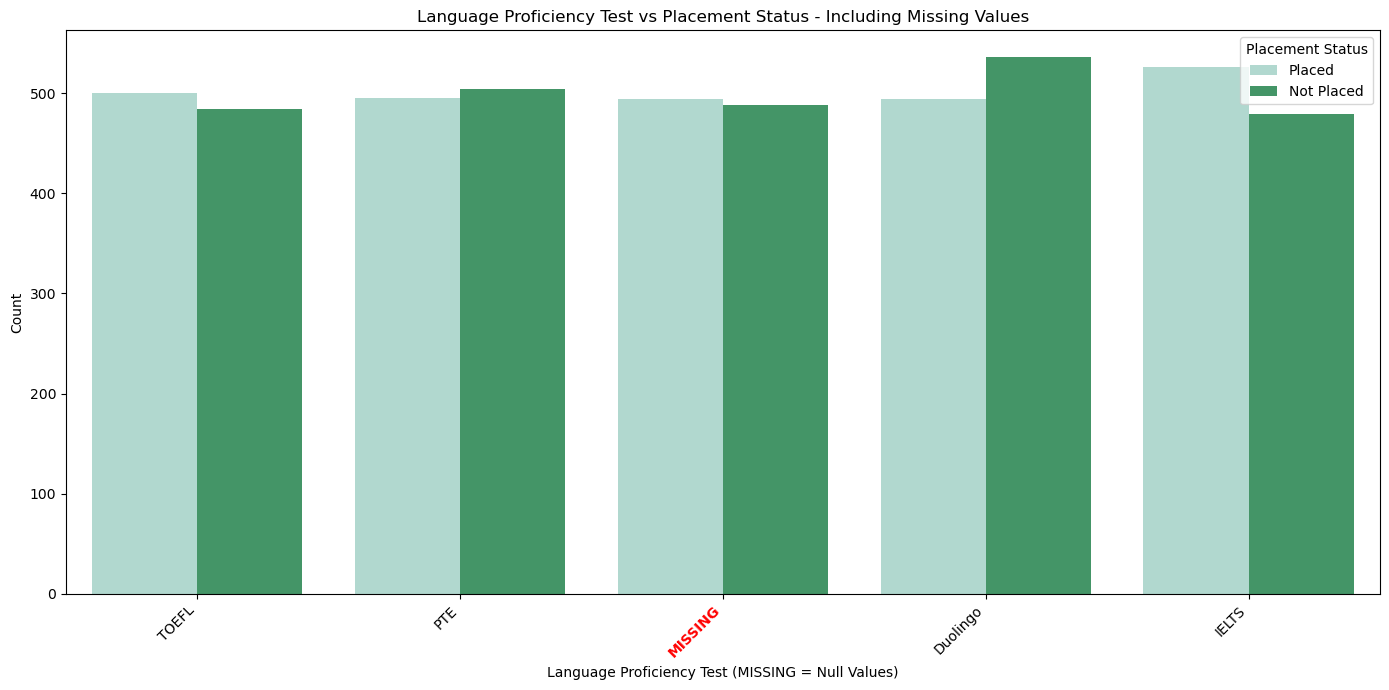

In [30]:
df_plot = data.copy()


df_plot['language_proficiency_test'] = df_plot['language_proficiency_test'].fillna('MISSING')
df_plot['placement_status'] = df_plot['placement_status'].fillna('MISSING')

plt.figure(figsize=(14, 7))


sns.countplot(data=df_plot, 
             x='language_proficiency_test', 
             hue='placement_status', 
             palette='BuGn')

plt.title("Language Proficiency Test vs Placement Status - Including Missing Values")
plt.xlabel("Language Proficiency Test (MISSING = Null Values)")
plt.ylabel("Count")
plt.legend(title="Placement Status")
plt.xticks(rotation=45, ha='right')

for i, label in enumerate(plt.gca().get_xticklabels()):
    if label.get_text() == 'MISSING':
        label.set_color('red')
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [31]:
# As this chart missing values included  approximately same records in  positive and negative values of target variable .
#So we can drop records of null values.

In [32]:
df=data.dropna(axis=0)

In [33]:
df.isnull().sum()

student_id                   0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64

In [34]:
df.shape

(4018, 20)

Duplicated value

In [35]:
df.duplicated().sum()

np.int64(0)

Standardize

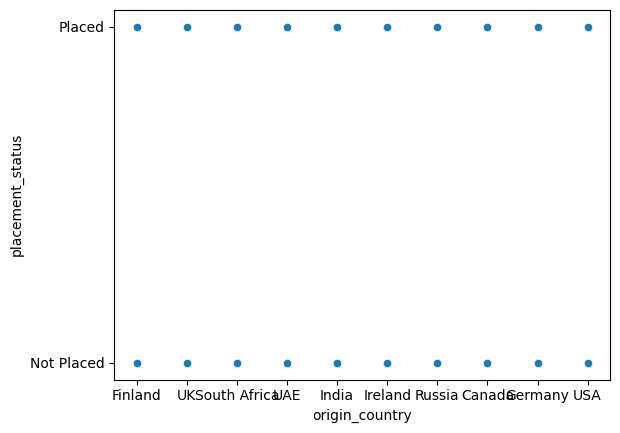

In [36]:
sns.scatterplot(data=df, x="origin_country", y="placement_status")
plt.show()

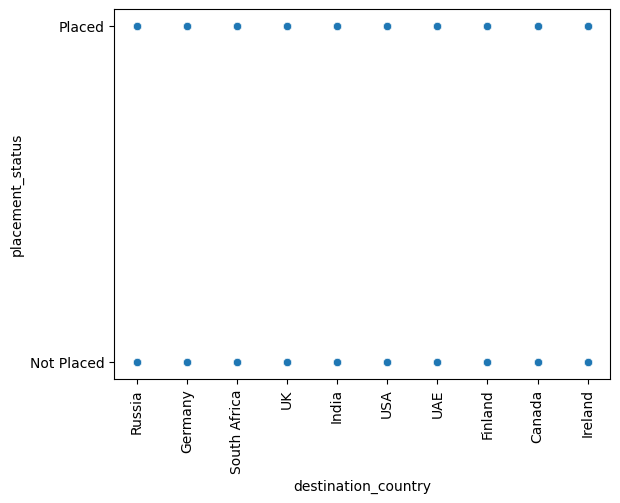

In [37]:
sns.scatterplot(data=df, x="destination_country", y="placement_status")
plt.xticks(rotation=90)
plt.show()

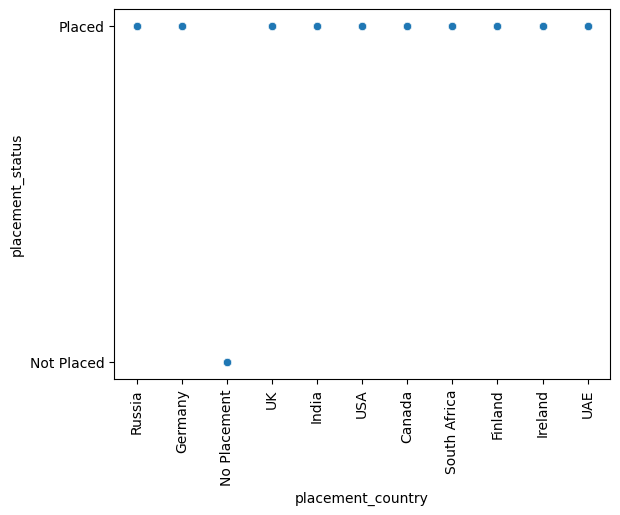

In [38]:
sns.scatterplot(data=df, x="placement_country", y="placement_status")
plt.xticks(rotation=90)
plt.show()

In [39]:
#in placement country ,desitnation country and origin country features have different forms .
# using pycountry library they are converted to uniform, structured format in Standardize .

In [40]:
import pycountry

In [41]:
custom_mappings = {
    "usa": "United States",
    "u.s.a": "United States",
    "us": "United States",
    "uk": "United Kingdom",
    "uae": "United Arab Emirates",
    "england": "United Kingdom"
}

def standardize_country(name):
    if not isinstance(name, str):
        return name
    
    name_clean = name.strip().lower()
    
   
    if name_clean in custom_mappings:
        return custom_mappings[name_clean]
    

    try:
        country = pycountry.countries.lookup(name_clean)
        return country.name
    except LookupError:
        return name.title()

In [42]:
df = df.copy()

In [43]:
df['placement_country'] = df['placement_country'].apply(standardize_country)

In [44]:
df = df.assign(placement_country=df['placement_country'].apply(standardize_country))


In [46]:
df['placement_country'].unique()

array(['Russia', 'Germany', 'No Placement', 'United Kingdom', 'India',
       'United States', 'Canada', 'South Africa', 'Finland', 'Ireland',
       'United Arab Emirates'], dtype=object)

In [47]:
df['destination_country'] = df['destination_country'].apply(standardize_country)

In [49]:
df = df.assign(destination_country=df['destination_country'].apply(standardize_country))


In [50]:
df['destination_country'].unique()

array(['Russia', 'Germany', 'South Africa', 'United Kingdom', 'India',
       'United States', 'United Arab Emirates', 'Finland', 'Canada',
       'Ireland'], dtype=object)

In [51]:
df['origin_country'] = df['origin_country'].apply(standardize_country)

In [52]:
df = df.assign(origin_country=df['origin_country'].apply(standardize_country))


In [53]:
df['origin_country'].unique()

array(['Finland', 'United Kingdom', 'South Africa',
       'United Arab Emirates', 'India', 'Ireland', 'Russia', 'Canada',
       'Germany', 'United States'], dtype=object)

In [44]:
df.to_csv("IT24100391DataCleaning.csv", index=False)
